# Aerodynamic Analysis with Panel Method

This notebooks shows an example from aerosandbox, which can be useful for aerodynamic optimization, and is similar to XFLR5 but is easier to script: https://pypi.org/project/AeroSandbox/

Running VLM3 calculation...
Meshing...
Meshing complete!
Calculating the collocation influence matrix...
Calculating the vortex center influence matrix...
Calculating the freestream influence...
Calculating vortex strengths...
Calculating forces on each panel...
Calculating total forces and moments...

Forces
-----
CL:  0.7939152659177438
CDi:  0.016715727103452746
CY:  -2.2569248156096893e-17
CL/CDi:  47.49510811011955

Moments
-----
Cl:  7.141625876184562e-18
Cm:  -0.05597461765705936
Cn:  4.2310408432908546e-19
VLM3 calculation complete!
Drawing...


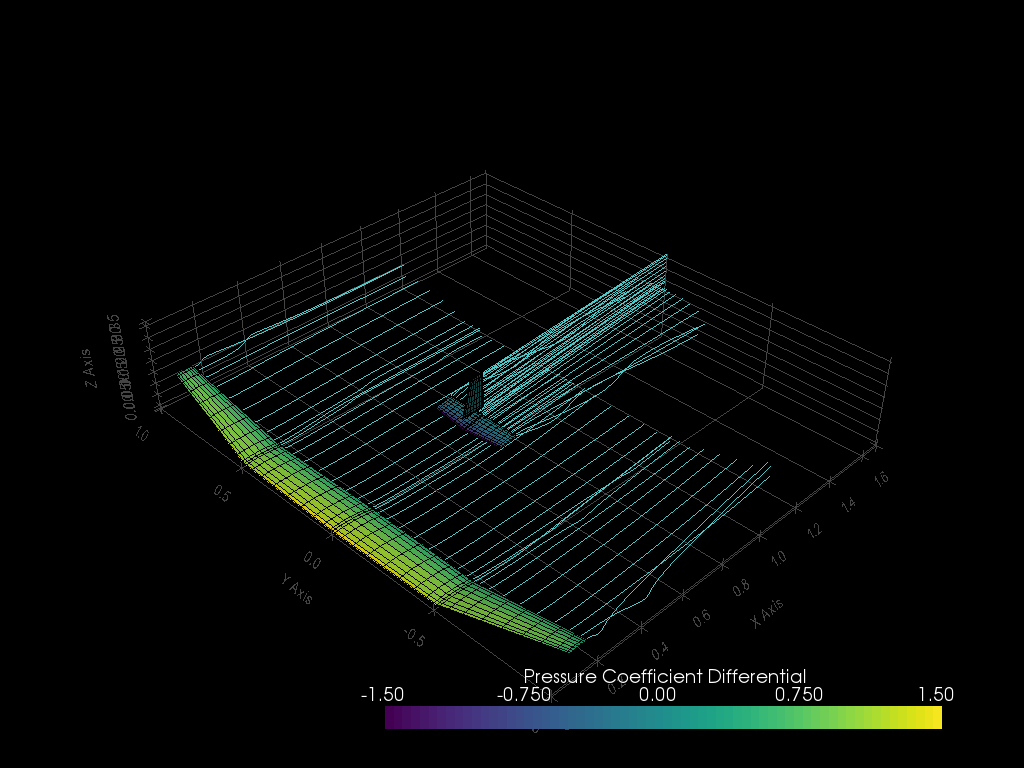

In [1]:
from aerosandbox import *

glider = Airplane(
    name="Peter's Glider",
    xyz_ref=[0, 0, 0], # CG location
    wings=[
        Wing(
            name="Main Wing",
            xyz_le=[0, 0, 0], # Coordinates of the wing's leading edge
            symmetric=True,
            xsecs=[ # The wing's cross ("X") sections
                WingXSec(  # Root
                    xyz_le=[0, 0, 0], # Coordinates of the XSec's leading edge, relative to the wing's leading edge.
                    chord=0.18,
                    twist=2, # degrees
                    airfoil=Airfoil(name="naca4412"),
                    control_surface_type='symmetric',  # Flap # Control surfaces are applied between a given XSec and the next one.
                    control_surface_deflection=0, # degrees
                    control_surface_hinge_point=0.75 # as chord fraction
                ),
                WingXSec(  # Mid
                    xyz_le=[0.01, 0.5, 0],
                    chord=0.16,
                    twist=0,
                    airfoil=Airfoil(name="naca4412"),
                    control_surface_type='asymmetric',  # Aileron
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(  # Tip
                    xyz_le=[0.08, 1, 0.1],
                    chord=0.08,
                    twist=-2,
                    airfoil=Airfoil(name="naca4412"),
                )
            ]
        ),
        Wing(
            name="Horizontal Stabilizer",
            xyz_le=[0.6, 0, 0.1],
            symmetric=True,
            xsecs=[
                WingXSec(  # root
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=-10,
                    airfoil=Airfoil(name="naca0012"),
                    control_surface_type='symmetric',  # Elevator
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(  # tip
                    xyz_le=[0.02, 0.17, 0],
                    chord=0.08,
                    twist=-10,
                    airfoil=Airfoil(name="naca0012")
                )
            ]
        ),
        Wing(
            name="Vertical Stabilizer",
            xyz_le=[0.6, 0, 0.15],
            symmetric=False,
            xsecs=[
                WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1,
                    twist=0,
                    airfoil=Airfoil(name="naca0012"),
                    control_surface_type='symmetric',  # Rudder
                    control_surface_deflection=0,
                    control_surface_hinge_point=0.75
                ),
                WingXSec(
                    xyz_le=[0.04, 0, 0.15],
                    chord=0.06,
                    twist=0,
                    airfoil=Airfoil(name="naca0012")
                )
            ]
        )
    ]
)

aero_problem = vlm3( # Analysis type: Vortex Lattice Method, version 3
    airplane=glider,
    op_point=OperatingPoint(
        velocity=10,
        alpha=5,
        beta=0,
        p=0,
        q=0,
        r=0,
    ),
)

aero_problem.run() # Runs and prints results to console
aero_problem.draw() # Creates an interactive display of the surface pressures and streamlines